# Numerical algorithms exam fall 19
## MC
**A)** \
Answer 1: 0.005 \
\
**B)** 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def cardinal_polynomials(nodes: list, i: int, t: list) -> float:
    nodes = np.array(nodes)
    t = np.array(t)

    x_i = nodes[i]
    p = 1
    for x_j in np.delete(nodes, i, axis=0):
        p *= (t - x_j) / (x_i - x_j)
    return p

# plt.plot(np.linspace(10,20), cardinal_polynomials([15,18,22], 1, np.linspace(10,20)))
np.linspace(10,20)[29], cardinal_polynomials([15,18,22], 1, np.linspace(10,20))[29]

(15.918367346938776, 0.465431070387339)

Answer 2: 0.500

**C)**

In [49]:
from sympy import *
n = symbols("n")
M = 5**n * exp(5*2)
expr = Lambda(n, 1/(4*(n+1)) * M * ((2/n)**(n+1)))
(expr(22)).evalf()

6.37478186431663e-7

Answer 1: 21

**D)**

In [ ]:
import math as m
def secant(a: float, b: float, nmax: int, f: type) -> list:
    fa = f(a)
    fb = f(b)
    x = [a, b]
    for _ in range(nmax - 1):
        print(fb, fa)
        d = fb * (b - a) / (fb - fa)
        a = b
        fa = fb
        b = b - d
        fb = f(b)
        x.append(b)
    return x

f = lambda x: m.sin(x)
secant(m.pi/4, 3*m.pi/4, 3, f)

Answer 2: $\frac{\pi}{4}, \frac{3\pi}{4}$

**E)**

In [45]:
# solve(1/(n**4) - 10**(-2), n)
# 3.16227766016838 * 0.25
# 0.790569415042095
# solve(1 / (n**4) - 10**(-6), n)
0.790569415042095 / 31.6227766016838

0.025

Answer 2: $h\approx 0.025$

## Part 2

**Question 1**

$$\frac{1}{n^4} \approx 10^{-6}$$ 
$$\left(\frac{1}{10^{6}}\right)^{\frac{1}{4}} \leq n$$

In [85]:
(1/(10**(-6)))**(1/4)

31.622776601683793

n should be at least 32

In [95]:
def MySimpson(f, a, b, n):
    if n % 2 == 1:
        print(f"ERROR: n={n} is not even")
        return float("NaN")
    h = (b - a) / n
    nodes = np.linspace(a, b, n + 1, endpoint=True)
    comp_simpson = (h / 3) * (f(a) + f(b))

    comp_simpson += ((4 * h) / 3) * sum(
        [f(a + (2 * i - 1) * h) for i in range(1, int(n / 2) + 1)]
    )
    comp_simpson += ((2 * h) / 3) * sum(
        [f(a + 2 * i * h) for i in range(1, int((n - 2) / 2) + 1)]
    )

    return comp_simpson

f = lambda x: m.sin(2*x)
MySimpson(f, 0, m.pi/2, 32)

1.0000005166847064

$$\int_{0}^{\frac{\pi}{2}} \sin(2x) dx = 1$$

**Question 2**

In [97]:
import numpy as np
xs = np.array([-1,-0.5, 0, 0.5, 1])
y = np.array([-1, 0, 1, 2, 1])
A = np.array([[m.sin(m.pi*x), m.cos(m.pi*x)] for x in xs])

np.linalg.solve(A.T @ A, A.T @ y)

array([1.        , 0.33333333])

$$c=\begin{bmatrix} 1.00\\ 0.33 \end{bmatrix}$$

In [103]:
fhat = lambda x: m.sin(m.pi * x) + (1/3)*cos(m.pi * x)
yhat = np.array([fhat(x) for x in xs])
print(round(np.sum(abs(y-yhat)),3))

4.667


Sum of errors is $\frac{8}{3}$

In [108]:
np.linalg.cond(A.T@A) * 0.01

0.014999999999999996

Upper bound of the relative error is 0.015

**Question 3**

\begin{align*}
f(x) &= ([x-x^2]^T - [1, 0]^T)^2 \\
f(x) &= (x-1)^2 + (x^2)^2 \\
f'(x) &= 4x^3+2x-2
\end{align*}

\begin{align*}
x_{n+1} &= x_n - \frac{f'(x_n)}{f''(x_n)} \\
x_{n+1} &= x_n - \frac{4x_n^3+2x_n-2}{12x_n^2+2} \\
x_{n+1} &= \frac{- 2 x^{3} + 6 x^{2} + 1}{6 x + 1}
\end{align*}

In [121]:
import pandas as pd
def newton(starting_point: float, nmax: int, f: type, f_div: type) -> list:
    x = starting_point
    xs = [x]
    for _ in range(nmax):
        fx = f(x)
        fp = f_div(x)
        x = x - (fx / fp)
        xs.append(x)
    return xs

f = lambda x: (4*x**3 + 2*x - 2)
f_div = lambda x: (12*x**2 + 2)
res = newton(1.0, 4, f, f_div)
pd.DataFrame({'Values of newton itterations': [round(r,3) for r in res]})

,Values of newton itterations
0,1.000
1,0.714
2,0.605
3,0.590
4,0.590


**Question 4**\
A has to be symmetric and positive definite (SPD)

$A^2$ requires $n^3$ LOps \
Cholesky factorization requires $\frac{1}{6}n^3$ LOps \
$A^2x=b$ requires $2n^2$ LOps

**Question 5**

\begin{align*}
Y &= \begin{bmatrix} x \\ x' \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \end{bmatrix} \\
Y' &= \begin{bmatrix} x' \\ x'' \end{bmatrix} = \begin{bmatrix} y_1 \\ 4y_1 - 4y_0 + e^{-2t} \end{bmatrix}\\
\end{align*}

In [138]:
import numpy as np
def odefun(t, y):
    return np.array([
        y[1],
        -(4*y[1] + 4 * y[0] - exp(-2*t))
    ], dtype=float)

In [148]:
def RK4system(fs: list, a:int, b:int, initial:list, h:float):
    '''
    Parameters
    ---------
    fs
        function (right hand side)
    
    a
        initial value
    
    b
        end point
    
    initial
        the guesses (x(0)=initial[0], x'(0)=initial[1])
    
    h
        complexity parameter
    
    Returns
    -------
    xs_list
        array([x(b), y(b)])
    
    ta
        list of t values used (mostly for plots)
    '''
    n = m.floor((b-a)/h)
    t = a
    h2 = h / 2
    xs = initial.copy()
    xs_list, ta = [xs], [t]
    for _ in range(n):
        k1 = h * fs(t, xs)
        k2 = h * fs(t + h2, xs + 0.5 * k1)
        k3 = h * fs(t + h2, xs + 0.5 * k2)
        k4 = h * fs(t + h, xs + k3)

        xs += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h 
        
        xs_list.append(xs.copy())
        ta.append(t)
    return xs_list, ta

xs, ta = RK4system(odefun, 0, 2, np.array([1,-1], dtype=float), 0.001)

print(xs[-1][0])

xs, ta = RK4system(odefun, 0, 2, np.array([1,-5], dtype=float), 0.001)

print(xs[-1][0])

0.09157819444367184
-0.054946916666181615


In [155]:
def secant(a: float, b: float, nmax: int, f: type) -> list:
    fa = f(a)
    fb = f(b)
    x = [a, b]
    for _ in range(nmax - 1):
        d = fb * (b - a) / (fb - fa)
        a = b
        fa = fb
        b = b - d
        fb = f(b)
        x.append(b)
    return x

f = lambda x: RK4system(odefun, 0, 2, np.array([1, x], dtype=float), 0.001)[0][-1][0]
secant(-1, -5, 2, f)

[-1, -5, -3.500000000000367]

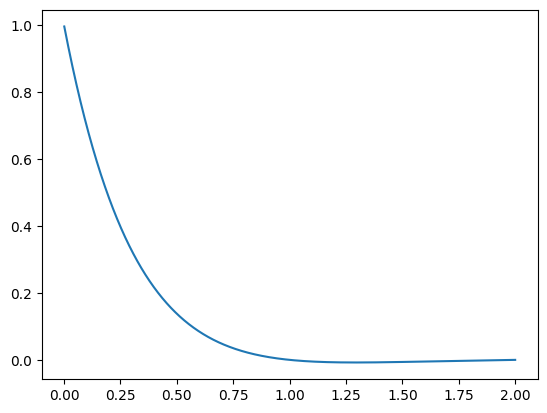

In [160]:
xs, ta = RK4system(odefun, 0, 2, np.array([1, -3.5], dtype=float), 0.001)
xs_0 = [x[0] for x in xs]
plt.plot(ta[1:], xs_0[1:])